# Working with Time Series

## Dates and Times in Python


### Native Python dates and times: ``datetime`` and ``dateutil``

In [1]:
from datetime import datetime

In [2]:
datetime(year=2019, month=8, day = 25)

datetime.datetime(2019, 8, 25, 0, 0)

In [3]:
from dateutil import parser

In [4]:
date = parser.parse("2019-08-25")

In [5]:
date

datetime.datetime(2019, 8, 25, 0, 0)

[strftime section](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior) 

[datetime documentation](https://docs.python.org/3/library/datetime.html)

[dateutil's online documentation](http://labix.org/python-dateutil)


### Typed arrays of times: NumPy's ``datetime64``

기존의 파이썬 datetime 을 보강하기 위해,  date 의 array 도 처리할 수 있게 numpy 에서 64-bit 로 처리하도록 라이브러리를 강화했음.

In [6]:
import numpy as np

In [7]:
date = np.array('2019-08-25')

In [8]:
date

array('2019-08-25', dtype='<U10')

In [10]:
#데이터 타입을 datetime64로 바꾸겠다!
date = np.array('2019-08-25', dtype = np.datetime64)

In [11]:
date

array('2019-08-25', dtype='datetime64[D]')

In [12]:
date + np.arange(14)

array(['2019-08-25', '2019-08-26', '2019-08-27', '2019-08-28',
       '2019-08-29', '2019-08-30', '2019-08-31', '2019-09-01',
       '2019-09-02', '2019-09-03', '2019-09-04', '2019-09-05',
       '2019-09-06', '2019-09-07'], dtype='datetime64[D]')

In [13]:
np.datetime64('2019-08-25')

numpy.datetime64('2019-08-25')

In [16]:
# 밀리세컨드(ms), 마이크로세컨드(us), 나노세컨드(ns) 로 표시하기
np.datetime64('2019-08-25 12:00:59.50', 'ns')

numpy.datetime64('2019-08-25T12:00:59.500000000')

[NumPy datetime64 documentation](http://docs.scipy.org/doc/numpy/reference/arrays.datetime.html)

|Code    | Meaning     | Time span (relative) | Time span (absolute)   |
|--------|-------------|----------------------|------------------------|
| ``Y``  | Year	       | ± 9.2e18 years       | [9.2e18 BC, 9.2e18 AD] |
| ``M``  | Month       | ± 7.6e17 years       | [7.6e17 BC, 7.6e17 AD] |
| ``W``  | Week	       | ± 1.7e17 years       | [1.7e17 BC, 1.7e17 AD] |
| ``D``  | Day         | ± 2.5e16 years       | [2.5e16 BC, 2.5e16 AD] |
| ``h``  | Hour        | ± 1.0e15 years       | [1.0e15 BC, 1.0e15 AD] |
| ``m``  | Minute      | ± 1.7e13 years       | [1.7e13 BC, 1.7e13 AD] |
| ``s``  | Second      | ± 2.9e12 years       | [ 2.9e9 BC, 2.9e9 AD]  |
| ``ms`` | Millisecond | ± 2.9e9 years        | [ 2.9e6 BC, 2.9e6 AD]  |
| ``us`` | Microsecond | ± 2.9e6 years        | [290301 BC, 294241 AD] |
| ``ns`` | Nanosecond  | ± 292 years          | [ 1678 AD, 2262 AD]    |
| ``ps`` | Picosecond  | ± 106 days           | [ 1969 AD, 1970 AD]    |
| ``fs`` | Femtosecond | ± 2.6 hours          | [ 1969 AD, 1970 AD]    |
| ``as`` | Attosecond  | ± 9.2 seconds        | [ 1969 AD, 1970 AD]    |

### Dates and times in pandas: best of both worlds

In [17]:
import pandas as pd

In [20]:
# 날짜를 문자열 리스트로 만들어보자
date_str = ['2019, 1, 1', '2019, 1, 4', '2019, 1, 5', '2019, 1, 6']

In [21]:
# 날짜들이 str로 저장되어있음
date_str

['2019, 1, 1', '2019, 1, 4', '2019, 1, 5', '2019, 1, 6']

In [22]:
idx = pd.to_datetime(date_str)

In [23]:
idx

DatetimeIndex(['2019-01-01', '2019-01-04', '2019-01-05', '2019-01-06'], dtype='datetime64[ns]', freq=None)

In [24]:
idx[0]

Timestamp('2019-01-01 00:00:00')

In [25]:
date_str[0]

'2019, 1, 1'

In [27]:
# strftime : string to time
idx[0].strftime('%A')

'Tuesday'

In [28]:
date

array('2019-08-25', dtype='datetime64[D]')

In [32]:
# timedelta : 시간간격
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2019-08-25', '2019-08-26', '2019-08-27', '2019-08-28',
               '2019-08-29', '2019-08-30', '2019-08-31', '2019-09-01',
               '2019-09-02', '2019-09-03', '2019-09-04', '2019-09-05'],
              dtype='datetime64[ns]', freq=None)

In [37]:
date + pd.to_timedelta(np.arange(12), 'm')

DatetimeIndex(['2019-08-25 00:00:00', '2019-08-25 00:01:00',
               '2019-08-25 00:02:00', '2019-08-25 00:03:00',
               '2019-08-25 00:04:00', '2019-08-25 00:05:00',
               '2019-08-25 00:06:00', '2019-08-25 00:07:00',
               '2019-08-25 00:08:00', '2019-08-25 00:09:00',
               '2019-08-25 00:10:00', '2019-08-25 00:11:00'],
              dtype='datetime64[ns]', freq=None)

## Pandas Time Series: Indexing by Time

In [42]:
index = pd.DatetimeIndex(['2016-07-04', '2017-08-04', '2018-07-04' , '2019-08-04'])

data = pd.Series([0,1,2,3], index = index)

In [43]:
data

2016-07-04    0
2017-08-04    1
2018-07-04    2
2019-08-04    3
dtype: int64

In [44]:
data['2018-01-01' : '2019-08-04']

2018-07-04    2
2019-08-04    3
dtype: int64

In [45]:
data['2018']

2018-07-04    2
dtype: int64

## Pandas Time Series Data Structures

In [46]:
# to_datetime( ) ()안의 문자열을 datetime로 바꿔라
dates = pd.to_datetime([datetime(2015,7,3), '4th of July, 2015', '2015-Jul-6', '07-07-2015', '20150708'])

In [47]:
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [48]:
#day까지 나타내라
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

In [49]:
#month까지 나타내라
dates.to_period('m')

PeriodIndex(['2015-07', '2015-07', '2015-07', '2015-07', '2015-07'], dtype='period[M]', freq='M')

In [51]:
#year까지 나타내라
dates.to_period('y')

PeriodIndex(['2015', '2015', '2015', '2015', '2015'], dtype='period[A-DEC]', freq='A-DEC')

### Regular sequences: ``pd.date_range()``

In [52]:
pd.date_range('2018-07-03', '2018-08-10')

DatetimeIndex(['2018-07-03', '2018-07-04', '2018-07-05', '2018-07-06',
               '2018-07-07', '2018-07-08', '2018-07-09', '2018-07-10',
               '2018-07-11', '2018-07-12', '2018-07-13', '2018-07-14',
               '2018-07-15', '2018-07-16', '2018-07-17', '2018-07-18',
               '2018-07-19', '2018-07-20', '2018-07-21', '2018-07-22',
               '2018-07-23', '2018-07-24', '2018-07-25', '2018-07-26',
               '2018-07-27', '2018-07-28', '2018-07-29', '2018-07-30',
               '2018-07-31', '2018-08-01', '2018-08-02', '2018-08-03',
               '2018-08-04', '2018-08-05', '2018-08-06', '2018-08-07',
               '2018-08-08', '2018-08-09', '2018-08-10'],
              dtype='datetime64[ns]', freq='D')

In [53]:
#기준일 기준으로 8일 날짜 가져옴
pd.date_range('2018-07-03', periods = 8)

DatetimeIndex(['2018-07-03', '2018-07-04', '2018-07-05', '2018-07-06',
               '2018-07-07', '2018-07-08', '2018-07-09', '2018-07-10'],
              dtype='datetime64[ns]', freq='D')

In [54]:
# 기준일 기준으로 8시간 간격으로 날짜 가져옴
pd.date_range('2018-07-03', periods = 8, freq = 'H')

DatetimeIndex(['2018-07-03 00:00:00', '2018-07-03 01:00:00',
               '2018-07-03 02:00:00', '2018-07-03 03:00:00',
               '2018-07-03 04:00:00', '2018-07-03 05:00:00',
               '2018-07-03 06:00:00', '2018-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [55]:
# 기준일 기준으로 8개월 간격으로 날짜 가져옴
pd.date_range('2018-07-03', periods = 8, freq = 'M')

DatetimeIndex(['2018-07-31', '2018-08-31', '2018-09-30', '2018-10-31',
               '2018-11-30', '2018-12-31', '2019-01-31', '2019-02-28'],
              dtype='datetime64[ns]', freq='M')

In [56]:
# 기준일 기준으로 8일 날짜 가져오되 비즈니스데이 날짜 가져옴
pd.date_range('2018-07-03', periods = 8, freq = 'B')

DatetimeIndex(['2018-07-03', '2018-07-04', '2018-07-05', '2018-07-06',
               '2018-07-09', '2018-07-10', '2018-07-11', '2018-07-12'],
              dtype='datetime64[ns]', freq='B')

In [57]:
# 00시 기준으로 2시간 30분 간격으로 시간 가져옴
pd.timedelta_range(0, periods = 9, freq = '2H30T')

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

## Frequencies and Offsets

| Code   | Description         | Code   | Description          |
|--------|---------------------|--------|----------------------|
| ``D``  | Calendar day        | ``B``  | Business day         |
| ``W``  | Weekly              |        |                      |
| ``M``  | Month end           | ``BM`` | Business month end   |
| ``Q``  | Quarter end         | ``BQ`` | Business quarter end |
| ``A``  | Year end            | ``BA`` | Business year end    |
| ``H``  | Hours               | ``BH`` | Business hours       |
| ``T``  | Minutes             |        |                      |
| ``S``  | Seconds             |        |                      |
| ``L``  | Milliseonds         |        |                      |
| ``U``  | Microseconds        |        |                      |
| ``N``  | nanoseconds         |        |                      |

## Resampling, Shifting, and Windowing

In [63]:
# 판다스에서 파일을 물러오면서 Date 컬럼은 날짜로 식별하여 불러오기 : parse_dates
# index_col 인덱스 컬럼은 Date로 하기
goog = pd.read_csv('GOOG.csv', parse_dates = ['Date'], index_col = 'Date')

In [64]:
goog.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,49.676899,51.693783,47.669952,49.845802,49.845802,44994500
2004-08-20,50.178635,54.187561,49.925285,53.805050,53.805050,23005800
2004-08-23,55.017166,56.373344,54.172661,54.346527,54.346527,18393200
2004-08-24,55.260582,55.439419,51.450363,52.096165,52.096165,15361800
2004-08-25,52.140873,53.651051,51.604362,52.657513,52.657513,9257400


In [65]:
# goog의 종가(close)만 가져와서 goog로 저장하자
goog = goog['Close']

In [61]:
goog.head()

Date
2004-08-19    49.845802
2004-08-20    53.805050
2004-08-23    54.346527
2004-08-24    52.096165
2004-08-25    52.657513
Name: Close, dtype: float64

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

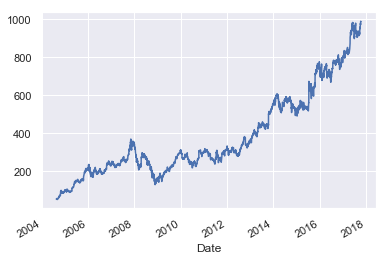

In [67]:
goog.plot()

| Code   | Description         | Code   | Description          |
|--------|---------------------|--------|----------------------|
| ``D``  | Calendar day        | ``B``  | Business day         |
| ``W``  | Weekly              |        |                      |
| ``M``  | Month end           | ``BM`` | Business month end   |
| ``Q``  | Quarter end         | ``BQ`` | Business quarter end |
| ``A``  | Year end            | ``BA`` | Business year end    |
| ``H``  | Hours               | ``BH`` | Business hours       |
| ``T``  | Minutes             |        |                      |
| ``S``  | Seconds             |        |                      |
| ``L``  | Milliseonds         |        |                      |
| ``U``  | Microseconds        |        |                      |
| ``N``  | nanoseconds         |        |                      |

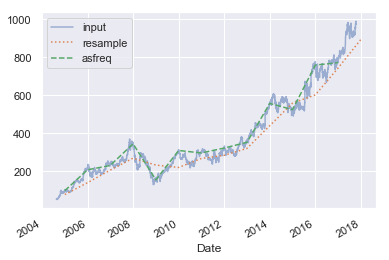

In [70]:
# resample
goog.plot(alpha = 0.5, style = '-')
goog.resample('BA').mean().plot(style = ':')
goog.asfreq('BA').plot(style = '--')
plt.legend(['input', 'resample', 'asfreq'])

In [71]:
data = goog.iloc[:10]

In [72]:
data

Date
2004-08-19    49.845802
2004-08-20    53.805050
2004-08-23    54.346527
2004-08-24    52.096165
2004-08-25    52.657513
2004-08-26    53.606342
2004-08-27    52.732029
2004-08-30    50.675404
2004-08-31    50.854240
2004-09-01    49.801090
Name: Close, dtype: float64

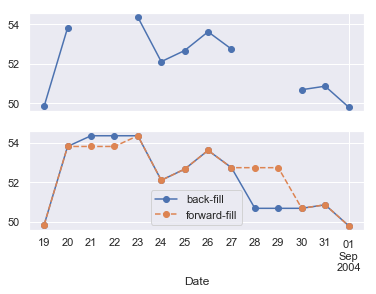

In [76]:
(flg, ax) = plt.subplots(2, sharex =  True)

# 중간중간 없는데이터가 존재함
data.asfreq('D').plot(ax=ax[0], marker = 'o')

#upsample 을 통해 비어있는 데이터를 채워넣음
data.asfreq('D', method = 'bfill').plot(ax=ax[1], style='-o') # 뒤에있는 값으로 채워라
data.asfreq('D', method = 'ffill').plot(ax=ax[1], style='--o') # 앞에있는 값으로 채워라
ax[1].legend(['back-fill', 'forward-fill'])

### Time-shifts

shift() 는 데이터를 옮기고,

tshift() 는 date 인덱스를 옮긴다.


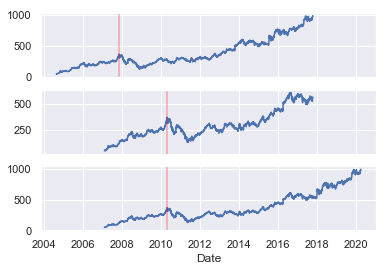

In [87]:
(flg, ax) = plt.subplots(3, sharex =  True)

goog = goog.asfreq('D', method = 'ffill')

goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.tshift(900).plot(ax=ax[2])

local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

ax[0].axvline(local_max, alpha=0.3, color = 'red')
ax[1].axvline(local_max + offset, alpha=0.3, color = 'red')
ax[2].axvline(local_max + offset, alpha=0.3, color = 'red')

### Rolling windows

해당 기간에서의 평균, 표준편자 구하기

In [88]:
rolling = goog.rolling(365)

In [89]:
rolling

Rolling [window=365,center=False,axis=0]

In [90]:
data = pd.DataFrame({'input':goog, 
                     '1year rolling mean':rolling.mean(),
                     '1year rolling std' : rolling.std()})

In [91]:
data.head()

,input,1year rolling mean,1year rolling std
Date,,,
2004-08-19,49.845802,NaN,NaN
2004-08-20,53.805050,NaN,NaN
2004-08-21,53.805050,NaN,NaN
2004-08-22,53.805050,NaN,NaN
2004-08-23,54.346527,NaN,NaN


In [ ]:
ax = data.plot(style=[])